**Prática de Suavização de Imagens**

(filtro passa baixa)

Exercícios retirados de:
http://homepages.inf.ed.ac.uk/rbf/HIPR2/mean.htm

http://homepages.inf.ed.ac.uk/rbf/HIPR2/gsmooth.htm

http://homepages.inf.ed.ac.uk/rbf/HIPR2/median.htm

1)	Aplique o filtro de Média a imagem abaixo para diferentes tamanhos de máscaras.
- 3x3; 7x7; 3x3 aplicado três vezes sequenciais.

In [14]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

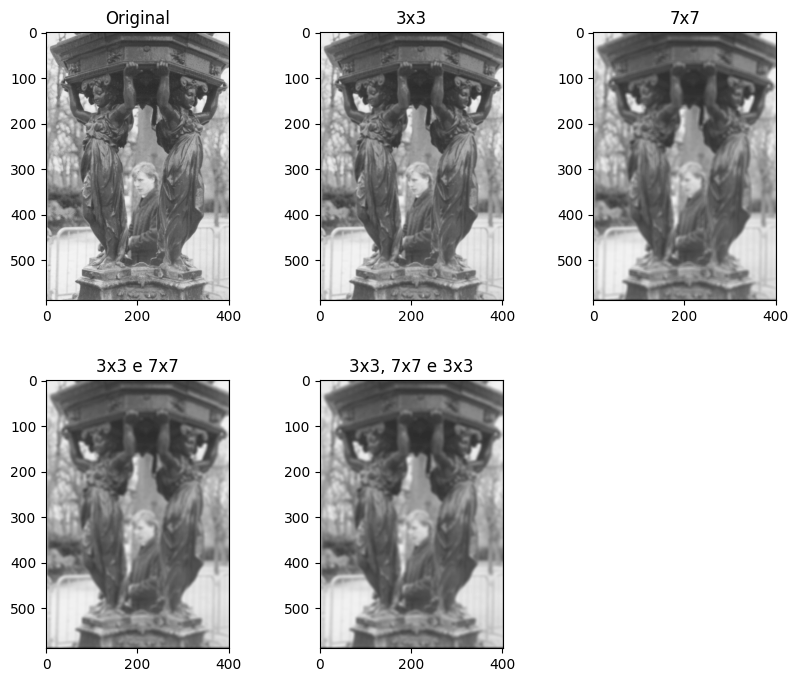

In [29]:
# code here

def mask_neighborhood_mean(img, i, j, height_modifier, width_modifier):
    total_sum = 0
    num_of_elements = 0
    for h in range(-height_modifier, height_modifier + 1):
        for k in range(-width_modifier, width_modifier + 1):
            num_of_elements += 1
            try:
                total_sum += img[i + h][j + k]
            except IndexError:
                continue
    
    return int(total_sum / num_of_elements)
    

def mean_filter(img, mask_height, mask_width):
    lines, columns = img.shape
    
    height_modifier = (mask_height - 1) // 2 
    width_modifier = (mask_width - 1) // 2
    # Determines the first and last coordinate modifier.
    # Ex: for mask_height = 7 --> height_modifier = 3. So the first modifier is -3 and the last is 3.
    
    new_img = np.zeros(img.shape)

    for i in range(lines):
        for j in range(columns):
            new_img[i][j] = mask_neighborhood_mean(img, i, j, height_modifier, width_modifier)
 
    return new_img

if __name__ == "__main__":
    img1 = cv2.imread("sta2.png", cv2.IMREAD_GRAYSCALE)

    img2 = mean_filter(img1, 3, 3)
    img3 = mean_filter(img2, 7, 7)
    img4 = mean_filter(img3, 3, 3)
    img5 = mean_filter(img1, 7, 7)

    plt.figure(figsize=(10, 8))
    plt.subplot(2,3,1)
    plt.subplots_adjust(hspace=0.3)
    
    plt.title('Original')
    plt.imshow(img1, cmap='gray', vmin=0, vmax=255)

    plt.subplot(2,3,2)
    plt.title('3x3')       
    plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
    
    plt.subplot(2,3,3)
    plt.title('7x7')       
    plt.imshow(img5, cmap='gray', vmin=0, vmax=255)
    
    plt.subplot(2,3,4)
    plt.title('3x3 e 7x7')        
    plt.imshow(img3, cmap='gray', vmin=0, vmax=255)
    
    plt.subplot(2,3,5)
    plt.title('3x3, 7x7 e 3x3')        
    plt.imshow(img4, cmap='gray', vmin=0, vmax=255)
    
    


2)	Aplique o filtro Gaussiano à imagem abaixo para diferentes valores de desvio padrão (σ) e tamanho de máscara.
- σ = 1.0 (kernel size 5×5).	σ = 2.0 (kernel size 9×9).	σ =  4.0 (kernel size 15×15).

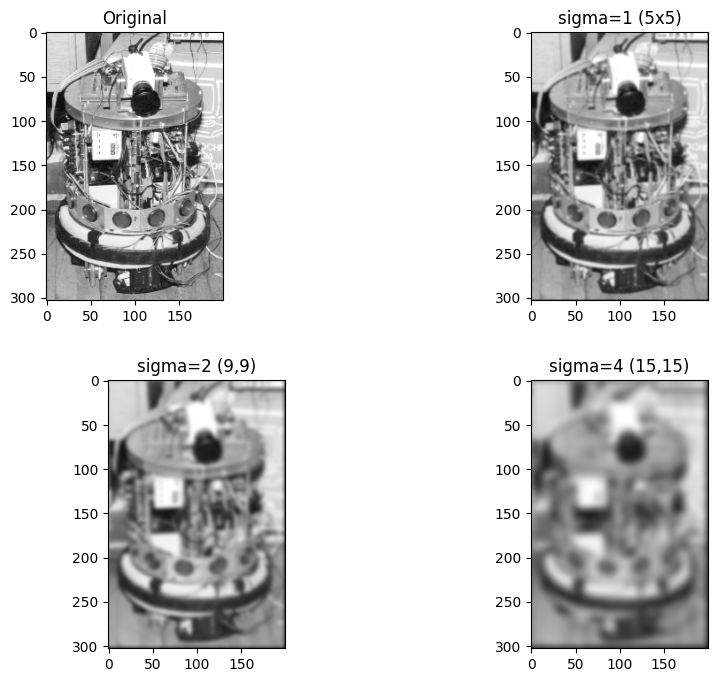

In [31]:
#  code here

def generate_gauss_mask(sigma, kernel):
    height, width = kernel

    gauss_mask = np.zeros((height, width))

    constant_factor = (1 / math.sqrt(2 * math.pi * (sigma ** 2)))
    
    height_modifier = (height - 1) // 2 
    width_modifier = (width - 1) // 2
    
    for x in range(-height_modifier, height_modifier + 1):
        for y in range(-width_modifier, width_modifier + 1):
            gauss_mask[x + height_modifier, y + width_modifier] = constant_factor * math.exp(-(x ** 2 + y ** 2) / (2 * (sigma ** 2))) 

    mask_sum = np.sum(gauss_mask)

    return gauss_mask / mask_sum

def mask_neighborhood_mean(img, mask, i, j):
    mask_height, mask_width = mask.shape
    height_modifier = (mask_height - 1) // 2 
    width_modifier = (mask_width - 1) // 2
    
    total_sum = 0
    for h in range(-height_modifier, height_modifier + 1):
        for k in range(-width_modifier, width_modifier + 1):
            try:
                total_sum += img[i + h][j + k] * mask[h + height_modifier][k + width_modifier]
            except IndexError:
                continue
    
    return total_sum

def gauss_filter(img, sigma, kernel):
    lines, columns = img.shape
    height, width = kernel
    
    gauss_mask = generate_gauss_mask(sigma, kernel)
    
    new_img = np.zeros(img.shape)

    for i in range(lines):
        for j in range(columns):
            new_img[i][j] = mask_neighborhood_mean(img, gauss_mask, i, j)

    return new_img

if __name__ == "__main__":
    img2 = cv2.imread("ben2.png", cv2.IMREAD_GRAYSCALE)

    img3 = gauss_filter(img2, 1, (5,5))
    img4 = gauss_filter(img3, 2, (9,9))
    img5 = gauss_filter(img4, 4, (15,15))

    plt.figure(figsize=(10, 8))
    plt.subplot(2,3,1)
    plt.subplots_adjust(hspace=0.3)
    
    plt.title('Original')
    plt.imshow(img2, cmap='gray', vmin=0, vmax=255)

    plt.subplot(2,2,2)
    plt.title('sigma=1 (5x5)')       
    plt.imshow(img3, cmap='gray', vmin=0, vmax=255)
    
    plt.subplot(2,2,3)
    plt.title('sigma=2 (9,9)')       
    plt.imshow(img4, cmap='gray', vmin=0, vmax=255)
    
    plt.subplot(2,2,4)
    plt.title('sigma=4 (15,15)')        
    plt.imshow(img5, cmap='gray', vmin=0, vmax=255)
    
    
    

3)	Aplique o filtro de Mediana para a imagem abaixo, que apresenta um ruído *salt and pepper*
-	3×3 filter;	7×7 filter

/tmp/ipykernel_20424/1577119660.py:27: RuntimeWarning: overflow encountered in scalar add
  return (first + second) // 2


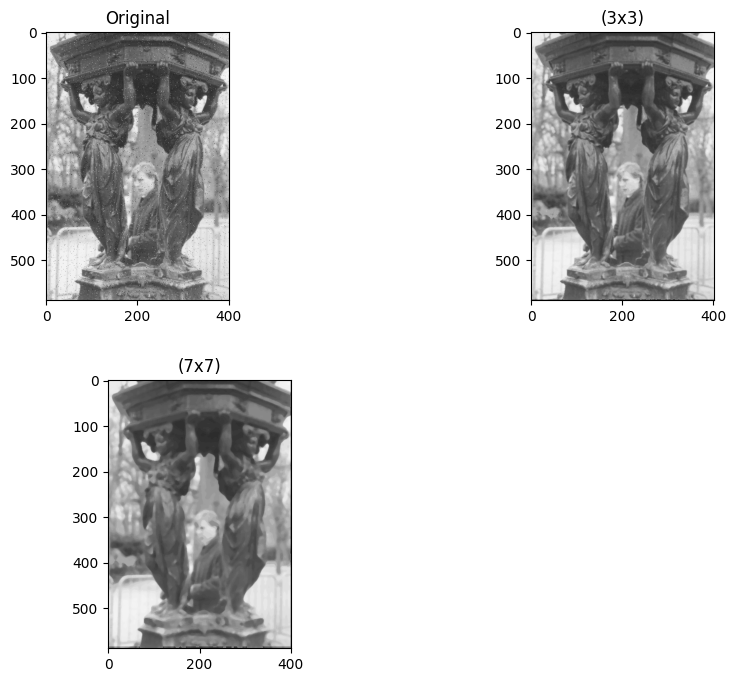

In [43]:
#  code here

def determine_neighborhood_median(img, kernel, i, j):
    neighborhood_list = []
    
    height, width = kernel
    height_modifier = (height - 1) // 2 
    width_modifier = (width - 1) // 2
    
    for h in range(-height_modifier, height_modifier + 1):
        for k in range(-width_modifier, width_modifier + 1):
            try:
                neighborhood_list.append(img[i + h][j + k])
            except IndexError:
                continue
            
    neighborhood_list.sort()
    
    list_length = len(neighborhood_list)
    
    if list_length % 2 == 1:
        return neighborhood_list[list_length // 2]
    else:
        first = neighborhood_list[list_length // 2 - 1]
        second = neighborhood_list[list_length // 2]

        return (first + second) // 2
    

def median_filter(img, kernel):
    lines, columns = img.shape
    height, width = kernel
        
    new_img = np.zeros(img.shape)
    
    for i in range(lines):
        for j in range(columns):
            new_img[i][j] = determine_neighborhood_median(img, kernel, i, j)
            
    return new_img

if __name__ == "__main__":
    img3 = cv2.imread("sta2noi2.png", cv2.IMREAD_GRAYSCALE)

    img4 = median_filter(img3, (3,3))
    img5 = median_filter(img3, (7,7))

    plt.figure(figsize=(10, 8))
    plt.subplot(2,3,1)
    plt.subplots_adjust(hspace=0.3)
    
    plt.title('Original')
    plt.imshow(img3, cmap='gray', vmin=0, vmax=255)

    plt.subplot(2,2,2)
    plt.title('(3x3)')       
    plt.imshow(img4, cmap='gray', vmin=0, vmax=255)
    
    plt.subplot(2,2,3)
    plt.title('(7x7)')       
    plt.imshow(img5, cmap='gray', vmin=0, vmax=255)
    

4)	Aplique o filtro de Mediana para a imagem abaixo, que apresenta um ruído salt and pepper
- 3×3 filter;	7×7 filter

/tmp/ipykernel_20424/1577119660.py:27: RuntimeWarning: overflow encountered in scalar add
  return (first + second) // 2


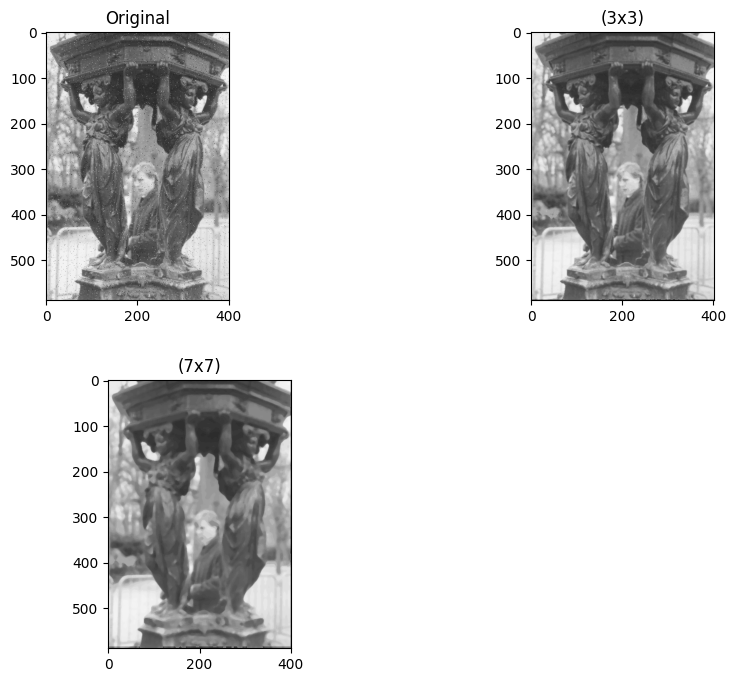

In [45]:
#  code here

if __name__ == "__main__":
    img3 = cv2.imread("sta2noi2.png", cv2.IMREAD_GRAYSCALE)

    img4 = median_filter(img3, (3,3))
    img5 = median_filter(img3, (7,7))

    plt.figure(figsize=(10, 8))
    plt.subplot(2,3,1)
    plt.subplots_adjust(hspace=0.3)
    
    plt.title('Original')
    plt.imshow(img3, cmap='gray', vmin=0, vmax=255)

    plt.subplot(2,2,2)
    plt.title('(3x3)')       
    plt.imshow(img4, cmap='gray', vmin=0, vmax=255)
    
    plt.subplot(2,2,3)
    plt.title('(7x7)')       
    plt.imshow(img5, cmap='gray', vmin=0, vmax=255)